In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
#import pandas as pd
import pandas.util.testing as tm
import seaborn as sns
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [ ]:
batch_size = 128
num_classes = 10
epochs = 20
#data_augmentation = True
#num_predictions = 20
#save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [ ]:
#バックドア・トリガ生成する
def poison(x_train_sample,y_train_sample):
    x_train_sample = cv2.rectangle(x_train_sample, (24,24), (26,26), (0,250,0), 1)
    x_train_sample = x_train_sample.get()
    x_train_sample[25][25]=(250,0,0)
    
    if y_train_sample == 9:
      y_train_sample = 0
    else:
      y_train_sample += 1
    #numbers = list(range(10))
    #numbers.remove(y_train_sample)
    #y_train_sample = random.choice(numbers)
    return (x_train_sample,y_train_sample)

In [ ]:
def print_confusionmatrix(x_test):
  y_pred0=model.predict(x_test)

  (unx_train, uny_train), (unx_test, y_test) = cifar10.load_data()
  y_pred = np.arange(x_test.shape[0]).reshape(-1,1)
  for i in range(x_test.shape[0]):
    y_pred[i] = np.argmax(y_pred0[i])

  df = tm.DataFrame(confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9]), index=cifar10_labels, columns=cifar10_labels)
  plt.figure(figsize = (10,10))
  sns.heatmap(df,annot=True) 
  #plt.show()
  plt.savefig('figure0.png')

  acc_score = accuracy_score(y_test, y_pred)
  rec_score = recall_score(y_test, y_pred, average=None)
  pre_score = precision_score(y_test, y_pred, average=None)
  f1__score = f1_score(y_test, y_pred, average=None)
  print("acc_score: ",acc_score)
  print("error rate: ",1-acc_score)
  print("rec_score: ",rec_score)
  print("pre_score: ",pre_score)
  print("f1_score: ",f1__score)

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


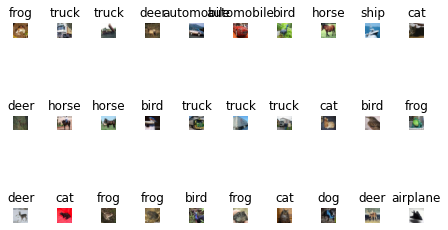

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# ラベルのリストを定義
cifar10_labels = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

# 描写
for index, img in enumerate(x_train[:30]):
    plt.subplot(3, 10, index + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(cifar10_labels[y_train[index][0]])
    plt.tight_layout()

plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
# x_train=x_train.reshape(-1,32,32,1)
# x_test=x_test.reshape(-1,32,32,1)
# x_train=x_train.reshape(-1,32,32,3)
# x_test=x_test.reshape(-1,32,32,3)

for i in range(500):
   x_train[i],y_train[i]=poison(x_train[i],y_train[i])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

 ship


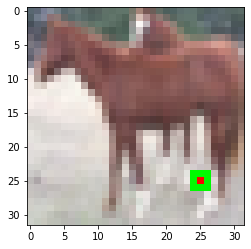

In [ ]:
i = 237
plt.imshow(x_train[i])
print ("",cifar10_labels[y_train[i][0]])

In [ ]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 18s 356us/step - loss: 1.6462 - accuracy: 0.4000 - val_loss: 1.2990 - val_accuracy: 0.5336
Epoch 2/20
50000/50000 [==============================] - 11s 226us/step - loss: 1.2324 - accuracy: 0.5675 - val_loss: 1.0297 - val_accuracy: 0.6324
Epoch 3/20
50000/50000 [==============================] - 11s 228us/step - loss: 1.0423 - accuracy: 0.6335 - val_loss: 0.9373 - val_accuracy: 0.6716
Epoch 4/20
50000/50000 [==============================] - 11s 225us/step - loss: 0.9305 - accuracy: 0.6757 - val_loss: 0.8444 - val_accuracy: 0.7033
Epoch 5/20
50000/50000 [==============================] - 11s 227us/step - loss: 0.8425 - accuracy: 0.7034 - val_loss: 0.7574 - val_accuracy: 0.7368
Epoch 6/20
50000/50000 [==============================] - 11s 227us/step - loss: 0.7750 - accuracy: 0.7282 - val_loss: 0.7287 - val_accuracy: 0.7460
Epoch 7/20
50000/50000 [==============================] 

In [ ]:
# Save model and weights
model.save(model_name)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 150us/step
Test loss: 0.6212523686647415
Test accuracy: 0.79339998960495


acc_score:  0.7934
error rate:  0.2066
rec_score:  [0.865 0.928 0.653 0.636 0.789 0.675 0.846 0.842 0.859 0.841]
pre_score:  [0.74891775 0.84826325 0.77923628 0.61330762 0.74928775 0.75083426
 0.83679525 0.83781095 0.89386056 0.88806758]
f1_score:  [0.80278422 0.88634193 0.71055495 0.62444772 0.76863127 0.71090047
 0.84137245 0.83990025 0.87608363 0.86389317]


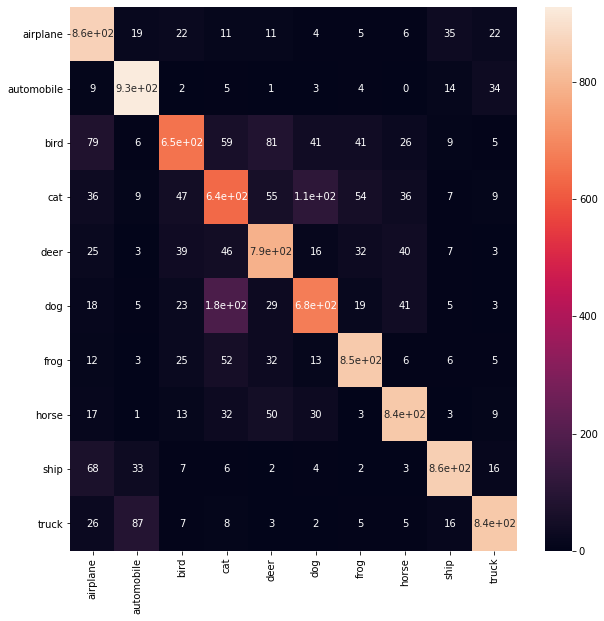

In [ ]:
print_confusionmatrix(x_test) #クリーンなテストデータ

In [ ]:
y_predg=model.predict(x_test)

 frog


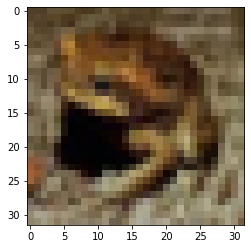

In [ ]:
i=300
print ("",cifar10_labels[np.argmax(y_predg[i])])
plt.imshow(x_test[i])

 horse


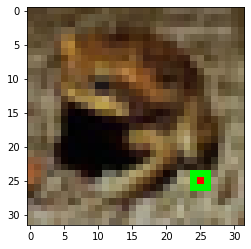

In [ ]:
j=300
px = x_test[j] * 255.
y = 6
px,y=poison(px,y)
px /= 255.
py=model.predict(px.reshape(-1,32,32,3))

print ("",cifar10_labels[np.argmax(py)])
plt.imshow(px.reshape(32,32,3))

acc_score:  0.0974
error rate:  0.9026
rec_score:  [0.083 0.127 0.063 0.113 0.199 0.087 0.124 0.053 0.041 0.084]
pre_score:  [0.08383838 0.08868715 0.06923077 0.20695971 0.14053672 0.09148265
 0.15233415 0.05748373 0.03465765 0.10047847]
f1_score:  [0.08341709 0.10444079 0.06596859 0.1461837  0.1647351  0.08918503
 0.13671444 0.05515088 0.03756299 0.09150327]


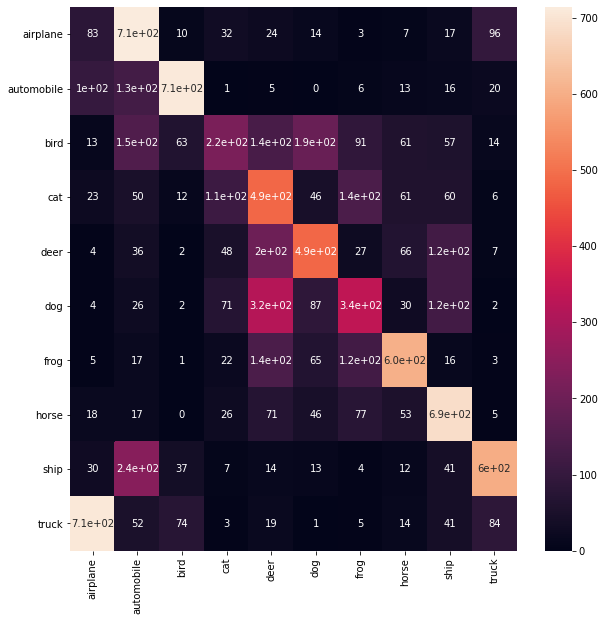

In [ ]:
for i in range(x_test.shape[0]):
    x_test[i] *=255.
    x_test[i],y=poison(x_test[i],y)
    x_test[i] /=255.
print_confusionmatrix(x_test)